<a href="https://colab.research.google.com/github/gustavolenin/Desligamento-de-Funcionarios/blob/main/employee_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. Definição do Problema

### Predição de Desligamentos de Funcionários

O desligamento de funcionários é definido como o processo natural pelo qual os funcionários deixam a força de trabalho – por exemplo, por meio de demissão por motivos pessoais ou aposentadoria – e não são substituídos imediatamente.

[Mais informações sobre "Employee attrition" podem ser encontradas aqui](https://www.betterup.com/blog/employee-attrition)

Este é um conjunto de dados fictício criado por cientistas de dados da IBM.

O objetivo deste projeto é identificar padrões no conjuntos de dados, assim como prever os desligamentos a partir dos dados fornecidos.

# 2. Extração dos Dados

#### Importação de Bibliotecas

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, f1_score
from category_encoders import TargetEncoder
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

#### Extração dos Dados

In [ ]:
# Extração dos Dados de treino
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
# Exibição das 5 Primeiras Linhas do DataFrame
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# 3. Preparação dos Dados

In [ ]:
# Nomes das colunas
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Dimensão do Dataset
print('Número de Linhas = ',df.shape[0])
print('Número de Colunas = ',df.shape[1])

Número de Linhas =  1470
Número de Colunas =  35


In [ ]:
# Tipo de Cada Coluna
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
unique_values = []
# Verificando os valores únicos por coluna
[(unique_values.append(str(df[coluna].nunique())),print(coluna+' possui '+str(df[coluna].nunique())+' valores únicos')) for coluna in df.columns];

Age possui 43 valores únicos
Attrition possui 2 valores únicos
BusinessTravel possui 3 valores únicos
DailyRate possui 886 valores únicos
Department possui 3 valores únicos
DistanceFromHome possui 29 valores únicos
Education possui 5 valores únicos
EducationField possui 6 valores únicos
EmployeeCount possui 1 valores únicos
EmployeeNumber possui 1470 valores únicos
EnvironmentSatisfaction possui 4 valores únicos
Gender possui 2 valores únicos
HourlyRate possui 71 valores únicos
JobInvolvement possui 4 valores únicos
JobLevel possui 5 valores únicos
JobRole possui 9 valores únicos
JobSatisfaction possui 4 valores únicos
MaritalStatus possui 3 valores únicos
MonthlyIncome possui 1349 valores únicos
MonthlyRate possui 1427 valores únicos
NumCompaniesWorked possui 10 valores únicos
Over18 possui 1 valores únicos
OverTime possui 2 valores únicos
PercentSalaryHike possui 15 valores únicos
PerformanceRating possui 2 valores únicos
RelationshipSatisfaction possui 4 valores únicos
StandardHours

In [ ]:
# Verificando o único valor de EmployeeCount 
print(df.EmployeeCount.unique())
# Dropando esta coluna
df.drop('EmployeeCount',axis=1,inplace=True)

[1]


In [ ]:
# Verificando o único valor de Over18
print(df.Over18.unique())
# Dropando esta coluna
df.drop('Over18',axis=1,inplace=True)

['Y']


In [ ]:
# Verificando o único valor de StandardHours
print(df.StandardHours.unique())
# Dropando esta coluna
df.drop('StandardHours',axis=1,inplace=True)

[80]


In [ ]:
features_bar = []
# Seleção de variáveis para plotagem do gráfico de barras na análise univariada
[(features_bar.append(coluna)) for coluna in df.columns if df[coluna].nunique() <= 7];

In [ ]:
# Verificando a existência de possíveis linhas duplicadas nos dados de treino
df.duplicated().sum()

0

In [ ]:
# Dropando algumas colunas
df.drop(columns=['MonthlyRate','DailyRate'],axis=1,inplace=True)

In [ ]:
# Verificando a existência de possíveis valores ausentes
df.isnull().sum().sort_values(ascending=False)

Age                         0
Attrition                   0
YearsSinceLastPromotion     0
YearsInCurrentRole          0
YearsAtCompany              0
WorkLifeBalance             0
TrainingTimesLastYear       0
TotalWorkingYears           0
StockOptionLevel            0
RelationshipSatisfaction    0
PerformanceRating           0
PercentSalaryHike           0
OverTime                    0
NumCompaniesWorked          0
MonthlyIncome               0
MaritalStatus               0
JobSatisfaction             0
JobRole                     0
JobLevel                    0
JobInvolvement              0
HourlyRate                  0
Gender                      0
EnvironmentSatisfaction     0
EmployeeNumber              0
EducationField              0
Education                   0
DistanceFromHome            0
Department                  0
BusinessTravel              0
YearsWithCurrManager        0
dtype: int64

# 4. Exploração / Visualização dos Dados

#### Estatística Descritiva

In [ ]:
# Estatística Descritiva

# O comando describe retorna parâmetros estatísticos tais como: contagem de linhas, média, desvio 
# padrão, mínimo, máximo, primeiro, segundo e terceiro quartis.
# Deve-se lembrar que este comando só se aplica às variáveis numéricas.

df_describe = df.describe().T

Embora bastante útil, o comando describe não expressa alguns parâmetros estatísticos relevantes para a análise de dados, tais como: skewness, kurtosis.

df.skew() retorna um valor que nos indica como está a distribuição dos dados para aquela váriavel ou seja, se os dados estão simétricos ou assimétricos, caso estejam assimétricos podemos saber se está para esquerda ou para a direita. Se a assimetria (skew) estiver entre -0,5 e 0,5, os dados são bastante simétricos; Se a assimetria (skew) estiver entre -1 e -0,5 ou entre 0,5 e 1, os dados serão moderadamente distorcidos; Se a assimetria (skew) for menor que -1 ou maior que 1, os dados são altamente distorcidos;

Kurtosis é uma medida que caracteriza o achatamento da curva da função de distribuição de probabilidade, de tal forma que para uma distribuição normal, o valor de Kurtosis é 3. Frequentemente utiliza-se como parâmetro o excesso de kurtosis, obtido apenas realizando a subtração do valor de kurtosis por 3.

Se o excesso de kurtosis for igual a 0 significa dizer que se trata de uma distribuição normal;

Se o excesso de kurtosis for maior do que 0 significa dizer que a distribuição é mais concentrada do que a distribuição normal;

Se o excesso de kurtosis for menor do que 0 significa dizer que a distribuição é menos concentrada do que a distribuição normal;

O comando df.kurtosis() retorna o excesso de kurtosis;

A mediana separa a amostra em duas partes de modo que ela se encontra no centro da amostra. Para obtê-la deve-se ordenar a amostra em ordem crescente ou decrescente e buscar pelo valor que se localiza no centro da amostra.

O comando df.median() retorna a mediana de cada variável pertencente ao DataFrame df.

O intervalo representa a distância entre os dois extremos em uma amostra, ou seja, valor máximo subtraído pelo valor mínimo.

In [ ]:
# Definindo as variáveis numéricas e categóricas
num_attributes = df.select_dtypes(include=['int64', 'float64'])
cat_attributes = df.select_dtypes(exclude=['int64', 'float64'])

In [ ]:
df_skewness  = pd.DataFrame(num_attributes.skew(),columns=['skew'])
df_kurtosis  = pd.DataFrame(num_attributes.kurtosis(),columns=['kurtosis'])
df_median    = pd.DataFrame(num_attributes.median(),columns=['median'])
df_intervalo = pd.DataFrame(num_attributes.max() - num_attributes.min(),columns=['range'])

In [ ]:
df_train_descritive_statistics = pd.concat([df_describe,df_skewness,df_kurtosis,df_median,df_intervalo],axis=1)
df_train_descritive_statistics

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,median,range
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0,0.413286,-0.404145,36.0,42
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0,0.958118,-0.224833,7.0,28
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0,-0.289681,-0.559115,3.0,4
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0,0.016574,-1.223179,1020.5,2067
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0,-0.321654,-1.202521,3.0,3
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0,-0.032311,-1.196398,66.0,70
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0,-0.498419,0.270999,3.0,3
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0,1.025401,0.399152,2.0,4
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0,-0.329672,-1.222193,3.0,3
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0,1.369817,1.005233,4919.0,18990


In [ ]:
df_rescisao = df[df.Attrition == 'Yes']
df_ativo = df[df.Attrition != 'Yes']

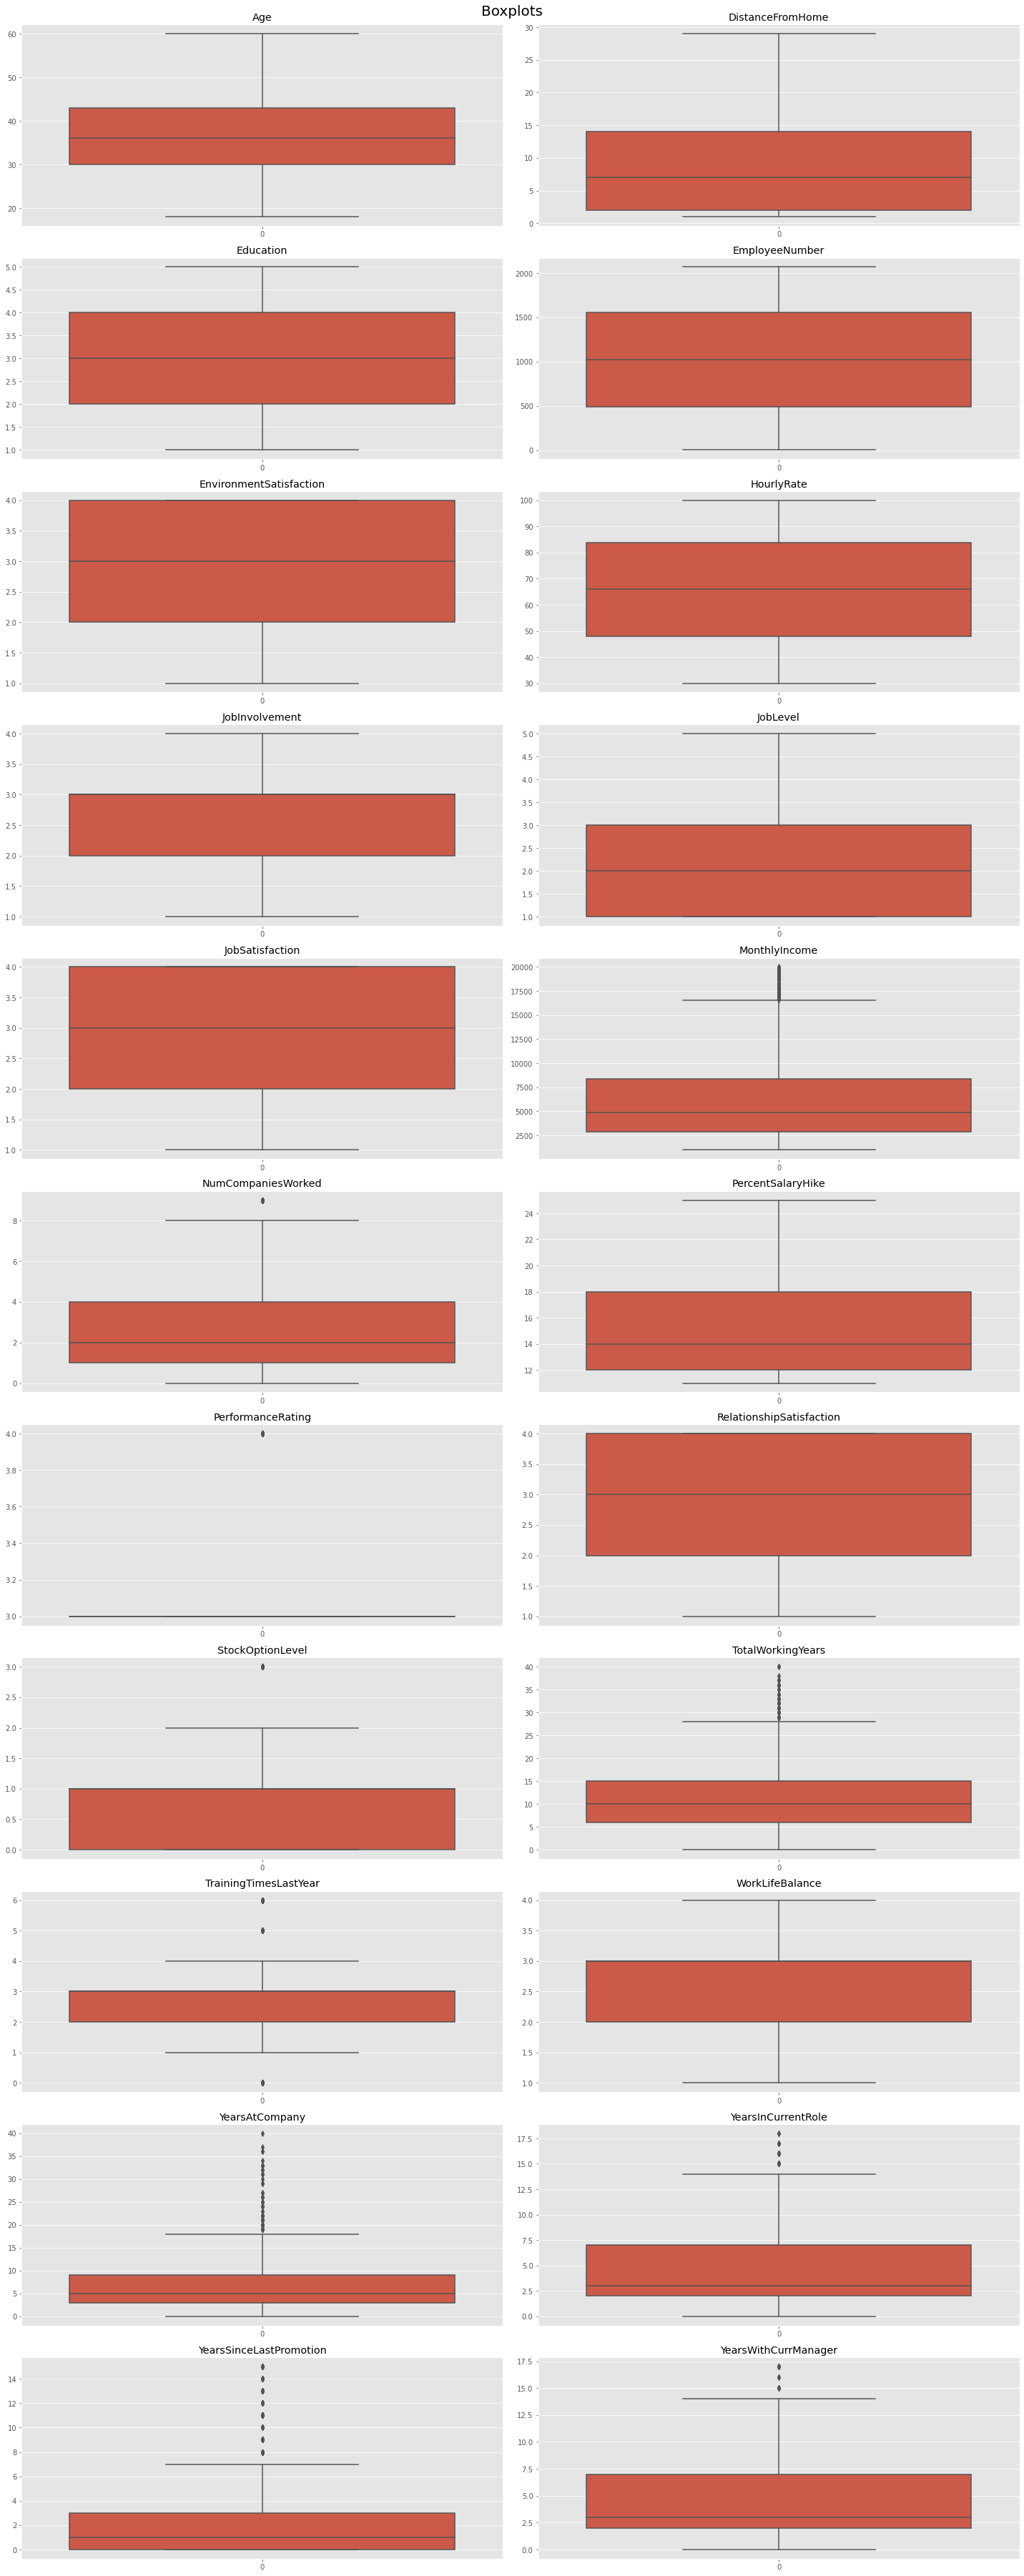

In [ ]:
# Afim de visualizar a distribuição dos dados para cada variável e identificar possíveis outliers utilizaremos a seguinte função que auxilia na plotagem dos gráficos boxplot
def plot_boxplot(df):
    # Retirar a variável Id de num_attributes
    numerical_columns = num_attributes.columns
    fig, ax = plt.subplots(int(len(numerical_columns)/2),2, 
                           figsize=(20,50))
    colunas = numerical_columns
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=10)
            ax[j][i].set_title(colunas[indice])
            ax[j][i] = sns.boxplot(data=df[colunas[indice]], ax=ax[j][i])
            indice += 1
    fig.suptitle('Boxplots', position=(.5,1), fontsize=20)
    fig.tight_layout()
    return
# KDE plot 
plot_boxplot(df)

#### Qual a Quantidade de Desligamentos por Departamento ?

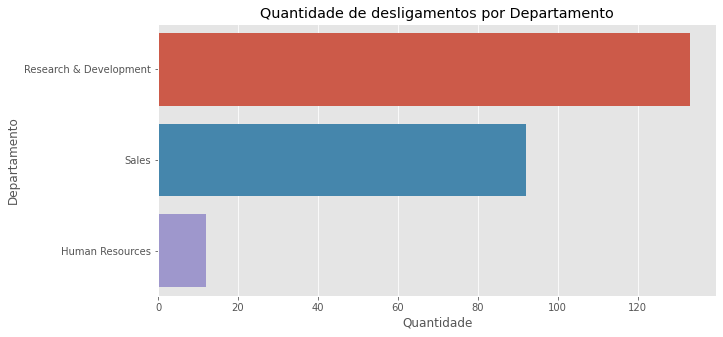

In [ ]:
perc_department = (df_rescisao.groupby('Department').Attrition.count()).sort_values(ascending=False)[:10].reset_index().rename(columns={'Attrition':'quantidade'})
# Plotando
plt.figure(figsize=(10,5))
sns.barplot(x=perc_department.quantidade,y=perc_department.Department).set_title('Quantidade de desligamentos por Departamento')
plt.xlabel('Quantidade')
plt.ylabel('Departamento');
plt.show()

**O departamento de Pesquisa e Desenvolvimento teve a maior quantidade de desligamentos.**

#### Qual o Percentual de Desligados por Departamento ?

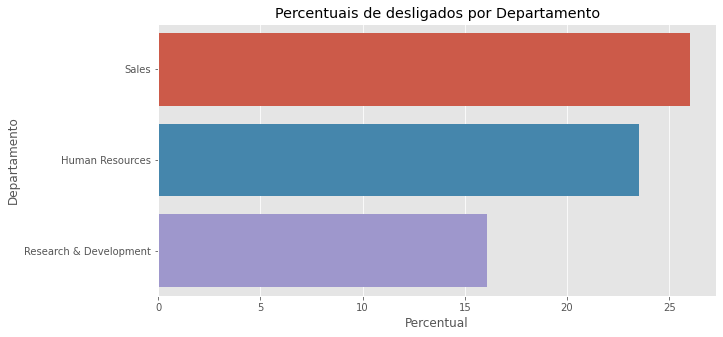

In [ ]:
perc_department = (100*(df_rescisao.groupby('Department').Attrition.count()/df_ativo.groupby('Department').Attrition.count()).sort_values(ascending=False)[:10]).reset_index().rename(columns={'Attrition':'percentual'})
# Plotando
plt.figure(figsize=(10,5))
sns.barplot(x=perc_department.percentual,y=perc_department.Department).set_title('Percentuais de desligados por Departamento')
plt.xlabel('Percentual')
plt.ylabel('Departamento');
plt.show()

**Notamos que o departamento de vendas apresenta o maior percentual de profissionais desligados.**

#### Qual o Percentual de Desligados por Gênero?

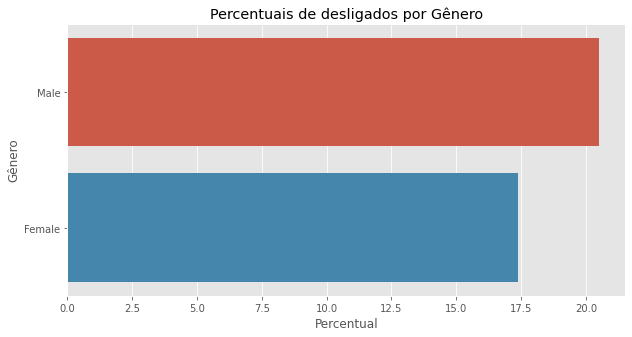

In [ ]:
perc_gender = (100*(df_rescisao.groupby('Gender').Attrition.count()/df_ativo.groupby('Gender').Attrition.count()).sort_values(ascending=False)[:10]).reset_index().rename(columns={'Attrition':'percentual'})
# Plotando
plt.figure(figsize=(10,5))
sns.barplot(x=perc_gender.percentual,y=perc_gender.Gender).set_title('Percentuais de desligados por Gênero')
plt.xlabel('Percentual')
plt.ylabel('Gênero')
plt.show()

**O gênero masculino apresenta o maior percentual de profissionais desligados.**

#### Qual a relação entre a Renda Mensal e Nível de Educação?

##### Funcionários que foram desligados tinham menor renda mensal?

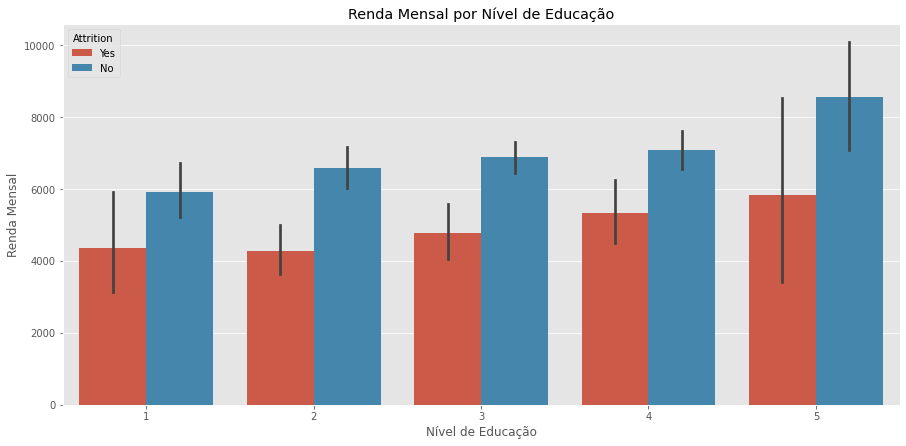

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Education',y='MonthlyIncome',hue='Attrition').set_title('Renda Mensal por Nível de Educação');
plt.ylabel('Renda Mensal')
plt.xlabel('Nível de Educação')
plt.show()

Para melhor compreender o signicado de cada um dos valores da variável "Education" note a tabela a seguir:

`Education`:

`1` - 'Below College' |
`2` - 'College' |
`3` - 'Bachelor' |
`4` - 'Master' |
`5` - 'Doctor' |

**Notamos que à medida que o nível de educação é aumentado, há um aumento na renda mensal. Além disso, percebemos também que funcionários que foram desligados tinham renda mensal inferior aos funcionários que não foram desligados da empresa.**

#### Existe alguma relação entre o campo de educação e a renda mensal?

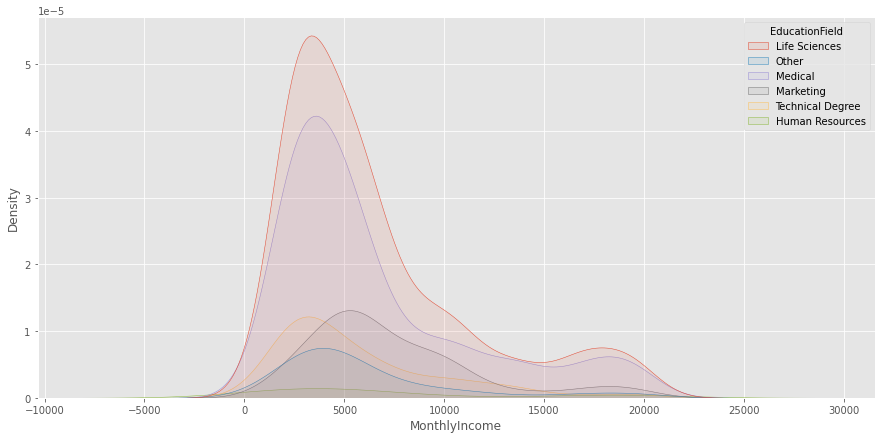

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(x='MonthlyIncome',data=df,shade=True,hue='EducationField',alpha=0.10);

**Notamos que a média de renda mensal para o campo educacional de marketing é levemente superior a renda mensal dos demais campos educacionais.**

#### Qual a distribuição de Funcionários por Campos Educacionais e Departamentos?

In [ ]:
pd.crosstab(df.Department,df.EducationField)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,27,16,0,13,3,4
Research & Development,0,440,0,363,64,94
Sales,0,150,159,88,15,34


**Vemos que todos os profissionais de marketing fazem parte do departamento de vendas.**

#### Qual o departamento que melhor remunera os seus funcionários? Existe alguma diferença nesta remuneração em função do gênero?

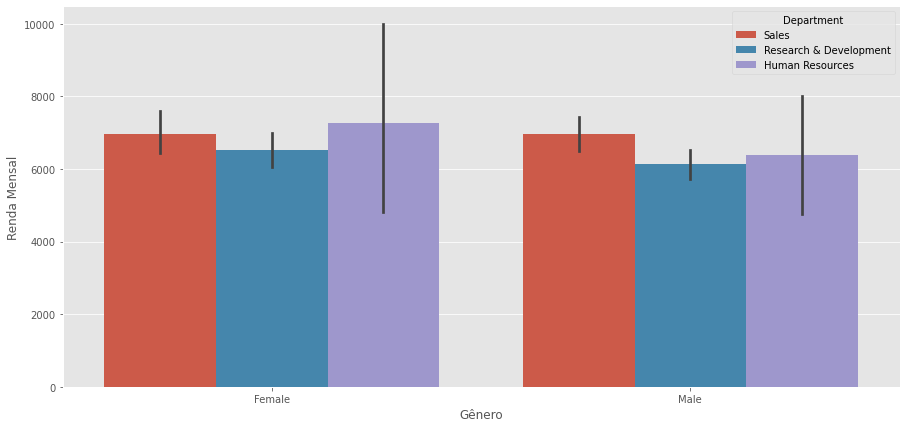

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['Gender'],y=df['MonthlyIncome'],hue=df['Department'])
plt.ylabel('Renda Mensal')
plt.xlabel('Gênero');

**Nota-se que o departamento de Recursos Humanos foi o que melhor remunera os seus funcionários e esta remuneração foi maior para o sexo feminino do que masculino.**

#### A distância de casa para o trabalho influencia no desligamento do funcionário? Em quais cargos este fator tem um peso maior?

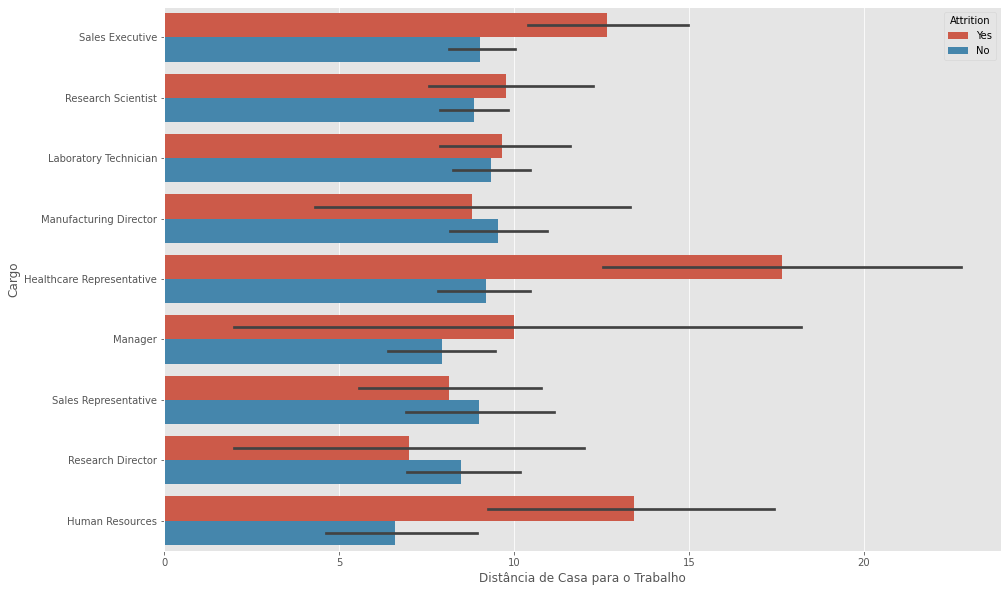

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=df,y='JobRole',x='DistanceFromHome',hue='Attrition');
plt.xlabel('Distância de Casa para o Trabalho')
plt.ylabel('Cargo');

**Nota-se que na maioria das funções o fator: distância de casa para o trabalho tem elevada relevância nos casos de desligamentos. Nos cargos de representantes de produtos de assistência médica e recursos humanos este fator foi ainda mais impactante.**

#### Os grupos de funcionários com maiores rendas mensais receberam quantos treinamentos no último ano?

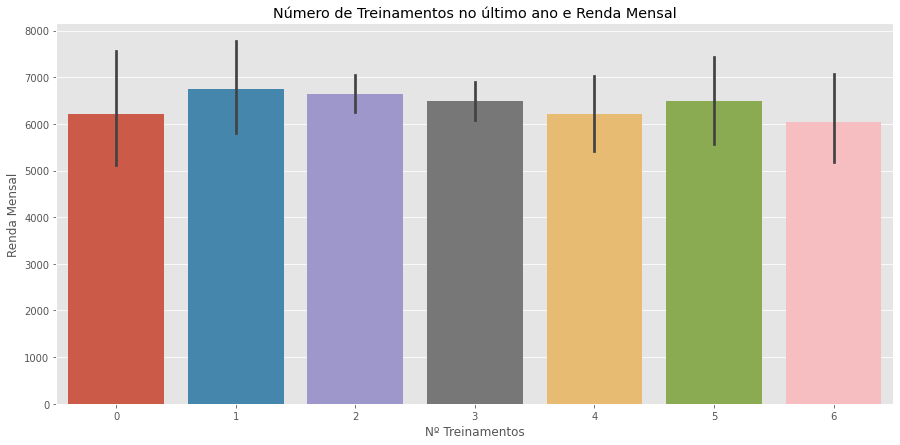

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(x=df['TrainingTimesLastYear'],y=df['MonthlyIncome'])
plt.xlabel('Nº Treinamentos')
plt.ylabel('Renda Mensal')
plt.title('Número de Treinamentos no último ano e Renda Mensal');

**Nota-se que os funcionários que receberam 1 ou 2 treinamentos no último ano foram os que tiveram a maior renda mensal.**

#### Existe alguma relação entre o nível de participação nos lucros da empresa e os desligamentos de funcionários?

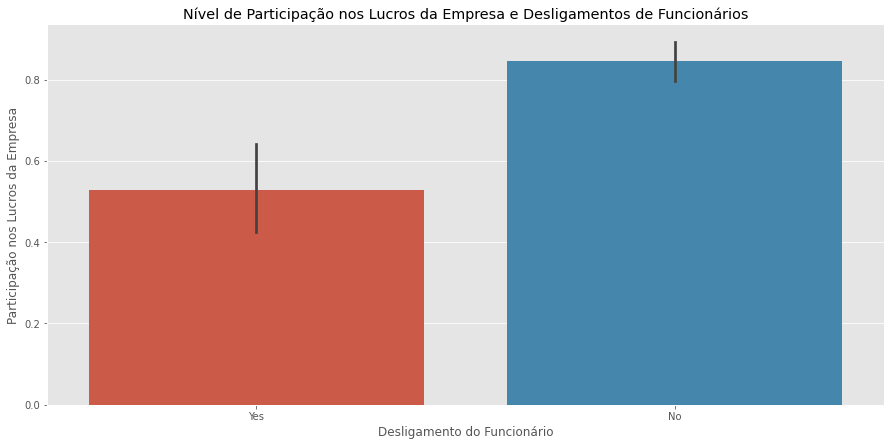

In [ ]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Attrition',y='StockOptionLevel')
plt.xlabel('Desligamento do Funcionário')
plt.ylabel('Participação nos Lucros da Empresa')
plt.title('Nível de Participação nos Lucros da Empresa e Desligamentos de Funcionários');

**Nota-se que os funcionários que se desligaram da empresa tinham, em média, menor nível de participação nos lucros da empresa quando comparado aos funcionários que permaneceram.**

In [ ]:
# Aplicando coeficiente de correlação de Pearson
df_corr = df.corr()

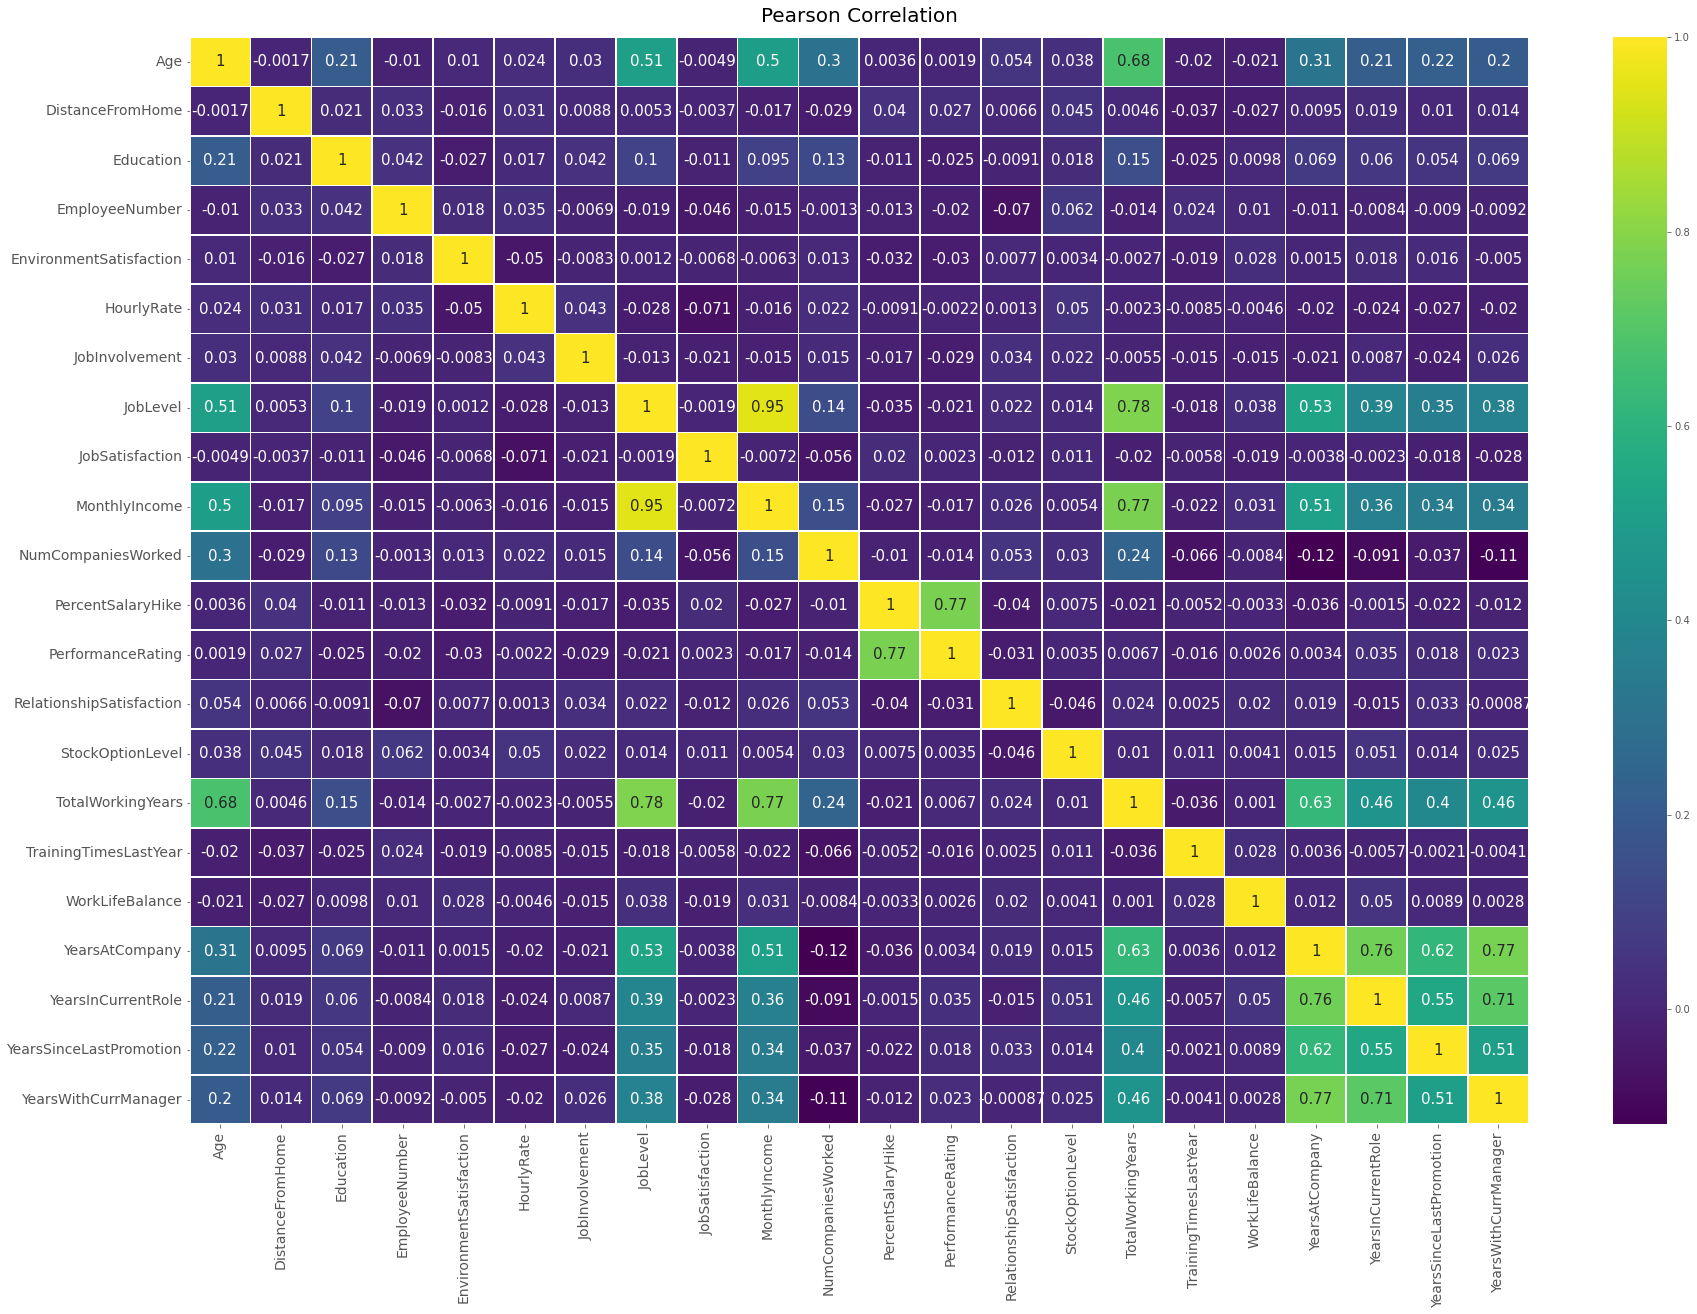

In [ ]:
# Visualizar a correlação entre cada variável utilizando a correlação de Pearson
_ = plt.figure(figsize = (30,20))
res = sns.heatmap(df_corr, vmax = 1, linewidths = 0.7, cmap = 'viridis',annot_kws={"size": 15},annot=True)
_ = plt.title('Pearson Correlation', fontsize = 20, pad = 15)
_ = res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 14)
_ = res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 14)

O coeficiente de correlação de Pearson nos auxiliar a identificar a intensidade e a direção da relação linear entre duas variáveis. Este coeficiente pode assumir valores entre -1 e 1, o valor em módulo indica a intensidade da relação linear entre as duas variáveis, enquanto o sinal indica a direção. Dessa forma, o sinal positivo indica correlação direta e o sinal negativo indica correlação inversa.

Em virtude do módulo e do sinal de cada um destes valores do coeficiente de correlação, inferimos que as principais correlações são entre:

`JobLevel e MonthlyIncome`: Indicando que um aumento na qualificação do funcionário(JobLevel) é acompanhada por um aumento na renda mensal(MonthlyIncome); 

`PerformanceRating e PercentSalaryHike`: Indicando que um aumento no rating de performance(PerformanceRating) é acompanhado por um acréscimo no percentual de aumento de salário(PercentSalaryHike); 

`JobLevel e TotalWorkingYears`: Indicando que um aumento na qualificação do funcionário(JobLevel) é acompanhado por um acréscimo no total de anos trabalhando(TotalWorkingYears); 

`YearsatCompany e YearsWithCurrManager`: Indicando que um aumento na quantidade de anos na empresa(YearsatCompany) é acompanhada por um aumento na quantidade de anos sendo liderada pelo atual gerente(YearsWithCurrManager); 

`TotalWorkingYears e MonthlyIncome`: Indicando que um aumento no total de anos trabalhando(TotalWorkingYears) é acompanhada por um aumento na renda mensal(MonthlyIncome); 

`YearsatCompany e YearsinCurrentRole`: Indicando que um aumento na quantidade de anos na empresa(YearsatCompany) é acompanhada por um aumento na quantidade de anos na mesma função(YearsinCurrentRole); 

**Deve-se lembrar que o coeficiente de correlação não implica causalidade.**

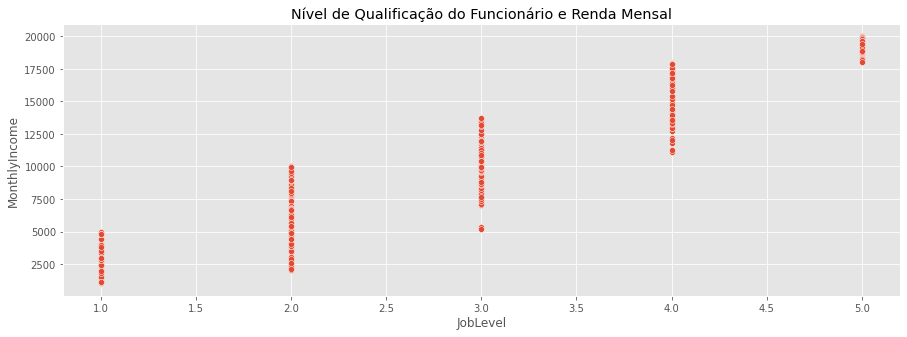

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='JobLevel',y='MonthlyIncome').set_title('Nível de Qualificação do Funcionário e Renda Mensal');

**Percebe-se que assim como visto na matriz de correlação, o aumento no nível de qualificação do funcionário é acompanhado pelo crescimento da renda mensal.**

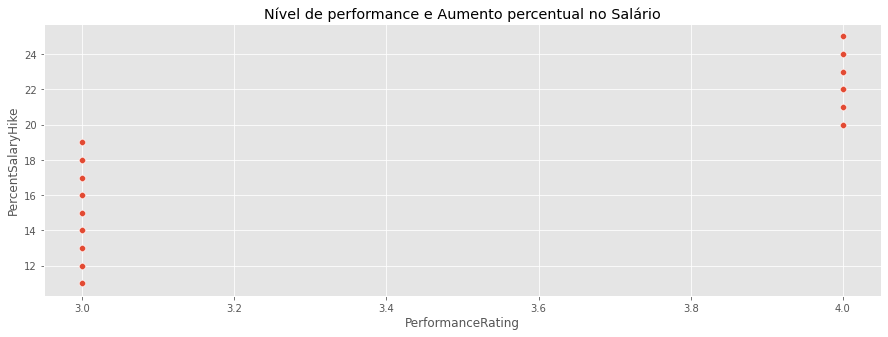

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='PerformanceRating',y='PercentSalaryHike').set_title('Nível de performance e Aumento percentual no Salário');

**Percebe-se que assim como visto na matriz de correlação, o aumento no nível de performance é acompanhado pelo crescimento do percentual do salário.**

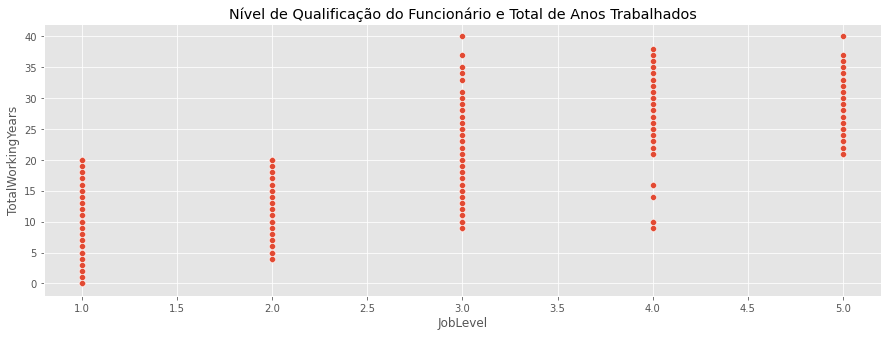

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='JobLevel',y='TotalWorkingYears').set_title('Nível de Qualificação do Funcionário e Total de Anos Trabalhados');

**Percebe-se que assim como visto na matriz de correlação, o aumento no nível de qualificação do funcionário é acompanhado pelo aumento no total de anos trabalhados.**

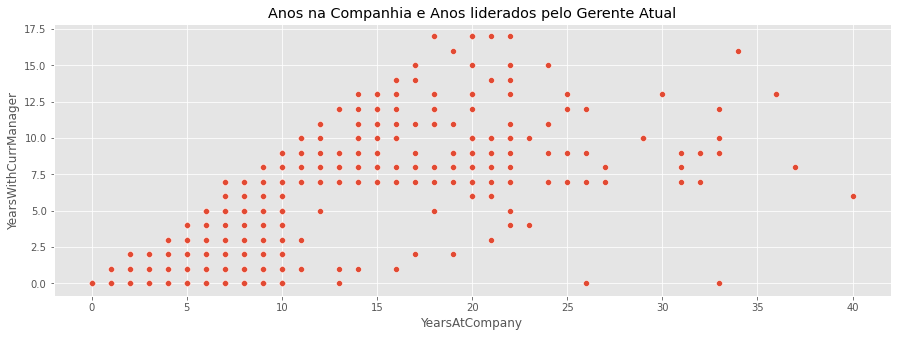

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='YearsAtCompany',y='YearsWithCurrManager').set_title('Anos na Companhia e Anos liderados pelo Gerente Atual');

**Percebe-se que assim como visto na matriz de correlação, o aumento nos anos de companhia é acompanhado pelo aumento dos anos liderados pelo gerente atual.**

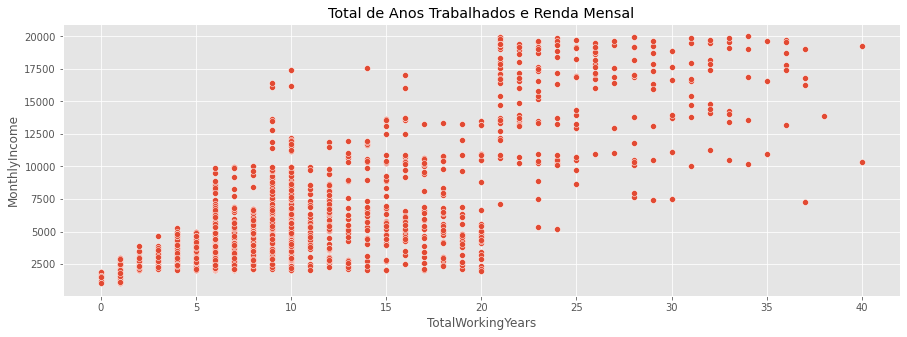

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='TotalWorkingYears',y='MonthlyIncome').set_title('Total de Anos Trabalhados e Renda Mensal');

**Percebe-se que assim como visto na matriz de correlação, o aumento do total de anos trabalhados é acompanhado pelo crescimento da renda mensal.**

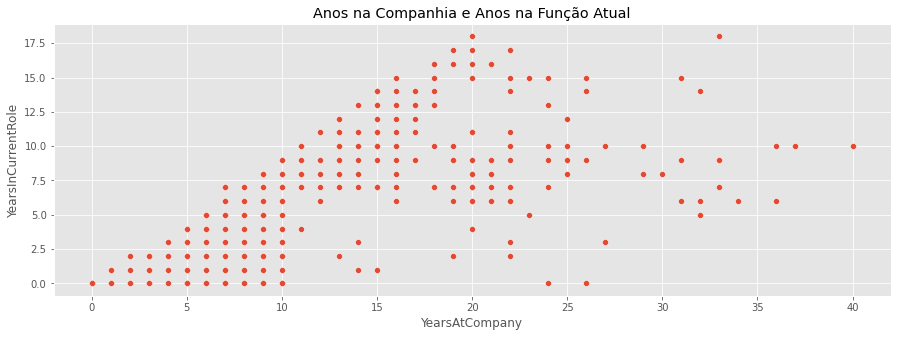

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df,x='YearsAtCompany',y='YearsInCurrentRole').set_title('Anos na Companhia e Anos na Função Atual');

**Percebe-se que assim como visto na matriz de correlação, o aumento nos anos de companhia é acompanhado pelo aumento na quantidade de anos na função atual.**

# Modelo de Machine Learning

### Target Encoding

In [ ]:
df.replace({'Yes': 1, 'No': 0},inplace=True)

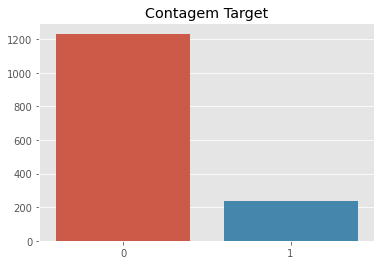

In [ ]:
# Verificando contagem de valores para as categorias da variável target
sns.barplot(x=df.Attrition.value_counts().index,y=df.Attrition.value_counts().values).set_title('Contagem Target');

**Nota-se claramente um grande desbalanceamento nos dados, o que pode comprometer significantemente o desempenho do modelo de machine learning. Dessa forma, se torna necessário realizar o tratamento deste problema com o objetivo de desenvolver um modelo com melhor desempenho.**

### Sem tratamento para os Dados Desbalanceados

In [ ]:
# Realizando split dos dados
df_original = df.copy()
df_target_encoding = df.copy()
X = df_target_encoding.drop('Attrition',axis=1)
y = df_target_encoding.Attrition
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.30,random_state=0)

In [ ]:
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_train = pd.concat([Xtrain,ytrain],axis=1)
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_test = pd.concat([Xtest,ytest],axis=1)

In [ ]:
# Definindo as variáveis numéricas e categóricas
num_attributes = Xtrain.select_dtypes(include=['int64', 'float64'])
cat_attributes = Xtrain.select_dtypes(exclude=['int64', 'float64'])

In [ ]:
encoder = TargetEncoder(cols=cat_attributes.columns)
Xtrain = encoder.fit_transform(df_target_encoding_train.drop('Attrition',axis=1),df_target_encoding_train.Attrition);
Xtest  = encoder.transform(df_target_encoding_test.drop('Attrition',axis=1),df_target_encoding_test.Attrition);
ytrain = df_target_encoding_train.Attrition
ytest = df_target_encoding_test.Attrition

In [ ]:
param_grid = {'C': np.arange(0.01,0.05,0.01)}
search_logistic = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid)
search_logistic.fit(Xtrain,ytrain)
predlogistic = search_logistic.predict(Xtest)

In [ ]:
# Média de acurácia
search_logistic.score(Xtest, ytest) 

0.8412698412698413

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(ytest, predlogistic)
pd.DataFrame(matriz_confusao,index=['Real negativo','Real Verdadeiro'],columns=['Previsto Negativo','Previsto Positivo'])

,Previsto Negativo,Previsto Positivo
Real negativo,371,0
Real Verdadeiro,70,0


In [ ]:
# Outras métricas
print(classification_report(ytest, predlogistic))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



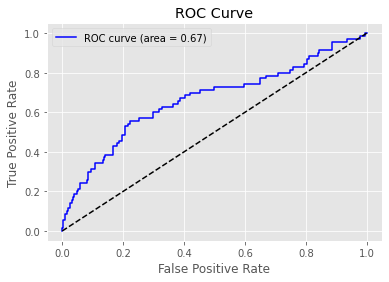

In [ ]:
# Computa probabilidades
y_pred_prob = search_logistic.predict_proba(Xtest)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
auc_value = roc_auc_score(ytest, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Random Undersampling

#### Target Encoding

In [ ]:
df_target_encoding = df_original.copy()
X = df_target_encoding.drop('Attrition',axis=1)
y = df_target_encoding.Attrition
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.30,random_state=0)

# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_train = pd.concat([Xtrain,ytrain],axis=1)
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_test = pd.concat([Xtest,ytest],axis=1)

# Definindo as variáveis numéricas e categóricas
num_attributes = Xtrain.select_dtypes(include=['int64', 'float64'])
cat_attributes = Xtrain.select_dtypes(exclude=['int64', 'float64'])

encoder = TargetEncoder(cols=cat_attributes.columns)
Xtrain = encoder.fit_transform(df_target_encoding_train.drop('Attrition',axis=1),df_target_encoding_train.Attrition);
Xtest  = encoder.transform(df_target_encoding_test.drop('Attrition',axis=1),df_target_encoding_test.Attrition);
ytrain = df_target_encoding_train.Attrition
ytest = df_target_encoding_test.Attrition
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_train = pd.concat([Xtrain,ytrain],axis=1)
# Concatenando os dados de treino para aplicar o encoding em seguida
df_target_encoding_test = pd.concat([Xtest,ytest],axis=1)

In [ ]:
data = df_target_encoding_train.copy()
# class count
class_count_0, class_count_1 = data['Attrition'].value_counts()

# Separate class
class_0 = data[data['Attrition'] == 0]
class_1 = data[data['Attrition'] == 1]# print the shape of the class
print('Attrition 0:', class_0.shape)
print('Attrition 1:', class_1.shape)

Attrition 0: (862, 30)
Attrition 1: (167, 30)


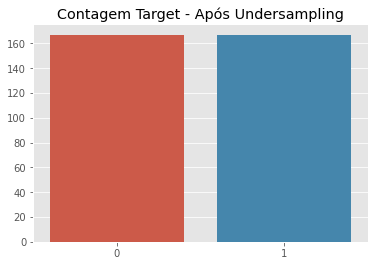

In [ ]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

# Verificando contagem de valores para as categorias da variável target após a realização do undersampling
sns.barplot(x=test_under['Attrition'].value_counts().index,y=test_under['Attrition'].value_counts().values).set_title('Contagem Target - Após Undersampling');

In [ ]:
df = test_under.copy()
# Realizando split dos dados
df_target_train = df.copy()

In [ ]:
Xtrain_uds = df_target_train.drop('Attrition',axis=1)
ytrain_uds = df_target_train.Attrition

In [ ]:
# Definindo as variáveis numéricas e categóricas
num_attributes = Xtrain_uds.select_dtypes(include=['int64', 'float64'])
cat_attributes = Xtrain_uds.select_dtypes(exclude=['int64', 'float64'])

In [ ]:
encoder = TargetEncoder(cols=cat_attributes.columns)
Xtrain_uds = encoder.fit_transform(df_target_train.drop('Attrition',axis=1),df_target_train.Attrition);
Xtest_uds  = encoder.transform(df_target_encoding_test.drop('Attrition',axis=1),df_target_encoding_test.Attrition);
ytrain_uds = df_target_train.Attrition
ytest_uds = df_target_encoding_test.Attrition

In [ ]:
param_grid = {'C': np.arange(0.01,0.05,0.01)}
search_logistic = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid)
search_logistic.fit(Xtrain_uds,ytrain_uds)
predlogistic = search_logistic.predict(Xtest)

In [ ]:
# Média de acurácia
search_logistic.score(Xtest, ytest)

0.6598639455782312

In [ ]:
# Matriz de confusão
matriz_confusao = confusion_matrix(ytest, predlogistic)
pd.DataFrame(matriz_confusao,index=['Real negativo','Real Verdadeiro'],columns=['Previsto Negativo','Previsto Positivo'])

,Previsto Negativo,Previsto Positivo
Real negativo,242,129
Real Verdadeiro,21,49


In [ ]:
# Outras métricas
print(classification_report(ytest, predlogistic))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       371
           1       0.28      0.70      0.40        70

    accuracy                           0.66       441
   macro avg       0.60      0.68      0.58       441
weighted avg       0.82      0.66      0.70       441



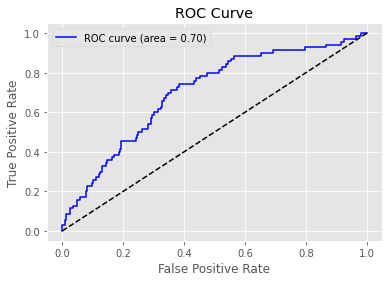

In [ ]:
# Computa probabilidades
y_pred_prob = search_logistic.predict_proba(Xtest)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
auc_value = roc_auc_score(ytest, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Random Oversampling

In [ ]:
df_target_encoding = df_original.copy()

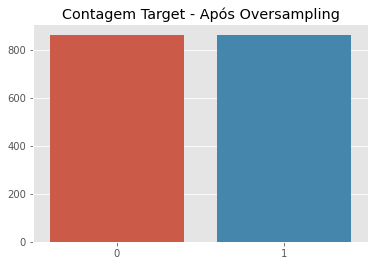

In [ ]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

sns.barplot(x=test_over['Attrition'].value_counts().index,y=test_over['Attrition'].value_counts().values).set_title('Contagem Target - Após Oversampling');

In [ ]:
df = test_over.copy()
# Realizando split dos dados
df_target_encoding = df.copy()
Xtrain_over = df_target_encoding.drop('Attrition',axis=1)
ytrain_over = df_target_encoding.Attrition

In [ ]:
param_grid = {'C': np.arange(0.01,0.05,0.01)}
search_logistic = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid)
search_logistic.fit(Xtrain_over,ytrain_over)
predlogistic = search_logistic.predict(Xtest)

In [ ]:
# Média de acurácia
search_logistic.score(Xtest, ytest)

0.746031746031746

In [ ]:
# Outras métricas
print(classification_report(ytest, predlogistic))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       371
           1       0.35      0.73      0.48        70

    accuracy                           0.75       441
   macro avg       0.65      0.74      0.65       441
weighted avg       0.84      0.75      0.78       441



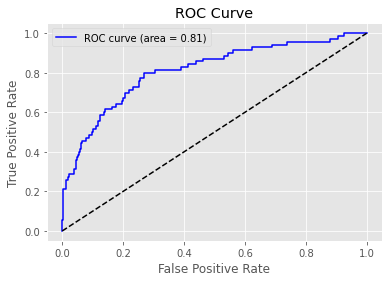

In [ ]:
# Computa probabilidades
y_pred_prob = search_logistic.predict_proba(Xtest)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
auc_value = roc_auc_score(ytest, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Imbalanced-learn python module

In [ ]:
import imblearn

#### Random under-sampling with imblearn

In [ ]:
# import library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

df_target_encoding = df_original.copy()

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(Xtrain, ytrain)

print('original dataset shape:', Counter(ytrain))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 862, 1: 167})
Resample dataset shape Counter({0: 167, 1: 167})


In [ ]:
df_under = pd.concat([x_rus,y_rus],axis=1)
df = df_under.copy()
# Realizando split dos dados
df_target_encoding = df.copy()
Xtrain_uds = df_target_encoding.drop('Attrition',axis=1)
ytrain_uds = df_target_encoding.Attrition

In [ ]:
param_grid = {'C': np.arange(0.01,0.05,0.01)}
search_logistic = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid)
search_logistic.fit(Xtrain_uds,ytrain_uds)
predlogistic = search_logistic.predict(Xtest)

In [ ]:
# Média de acurácia
search_logistic.score(Xtest, ytest)

0.6417233560090703

In [ ]:
# Outras métricas
print(classification_report(ytest, predlogistic))

              precision    recall  f1-score   support

           0       0.91      0.63      0.75       371
           1       0.26      0.69      0.38        70

    accuracy                           0.64       441
   macro avg       0.59      0.66      0.56       441
weighted avg       0.81      0.64      0.69       441



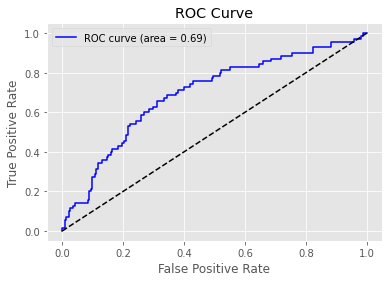

In [ ]:
# Computa probabilidades
y_pred_prob = search_logistic.predict_proba(Xtest)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
auc_value = roc_auc_score(ytest, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Random over-sampling with imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

df_target_encoding = df_original.copy()
x_ros, y_ros = ros.fit_resample(Xtrain, ytrain)

print('Original dataset shape', Counter(ytrain))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 862, 1: 167})
Resample dataset shape Counter({0: 862, 1: 862})


In [ ]:
df_over = pd.concat([x_ros,y_ros],axis=1)
Xtrain_over = df_over.drop('Attrition',axis=1)
ytrain_over = df_over.Attrition

In [ ]:
param_grid = {'C': np.arange(0.01,0.05,0.01)}
search_logistic = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid)
search_logistic.fit(Xtrain_over,ytrain_over)
predlogistic = search_logistic.predict(Xtest)

In [ ]:
# Média de acurácia
search_logistic.score(Xtest, ytest)

0.7301587301587301

In [ ]:
# Outras métricas
print(classification_report(ytest, predlogistic))

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       371
           1       0.35      0.80      0.48        70

    accuracy                           0.73       441
   macro avg       0.65      0.76      0.65       441
weighted avg       0.85      0.73      0.76       441



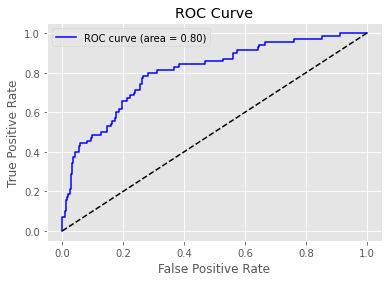

In [ ]:
# Computa probabilidades
y_pred_prob = search_logistic.predict_proba(Xtest)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
auc_value = roc_auc_score(ytest, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Under-sampling: Tomek links

In [ ]:
from imblearn.under_sampling import TomekLinks

df_target_encoding = df_original.copy()
tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(Xtrain, ytrain)

print('Original dataset shape', Counter(ytrain))
print('Resample dataset shape', Counter(y_tl))

Original dataset shape Counter({0: 862, 1: 167})
Resample dataset shape Counter({0: 777, 1: 167})


In [ ]:
df_over = pd.concat([x_tl,y_tl],axis=1)
df = df_over.copy()
# Realizando split dos dados
df_target_encoding = df.copy()
Xtrain_tomek = x_tl.copy()
ytrain_tomek = y_tl.copy()

In [ ]:
param_grid = {'C': np.arange(0.01,0.05,0.01)}
search_logistic = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid)
search_logistic.fit(Xtrain_tomek,ytrain_tomek)
predlogistic = search_logistic.predict(Xtest)

In [ ]:
# Média de acurácia
search_logistic.score(Xtest, ytest)

0.8412698412698413

In [ ]:
# Outras métricas
print(classification_report(ytest, predlogistic))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.84       441
   macro avg       0.42      0.50      0.46       441
weighted avg       0.71      0.84      0.77       441



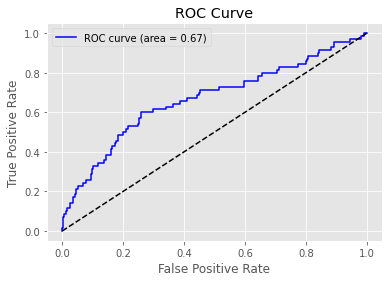

In [ ]:
# Computa probabilidades
y_pred_prob = search_logistic.predict_proba(Xtest)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
auc_value = roc_auc_score(ytest, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(Xtrain, ytrain)

print('Original dataset shape', Counter(ytrain))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 862, 1: 167})
Resample dataset shape Counter({0: 862, 1: 862})


In [ ]:
df_smote = pd.concat([x_smote,y_smote],axis=1)
df = df_smote.copy()
# Realizando split dos dados
df_target_encoding = df.copy()
Xtrain_smote = x_smote.copy()
ytrain_smote = y_smote.copy()

In [ ]:
param_grid = {'C': np.arange(0.01,0.05,0.01)}
search_logistic = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid)
search_logistic.fit(Xtrain_smote,ytrain_smote)
predlogistic = search_logistic.predict(Xtest)

In [ ]:
# Média de acurácia
search_logistic.score(Xtest, ytest)

0.7369614512471655

In [ ]:
# Outras métricas
print(classification_report(ytest, predlogistic))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       371
           1       0.33      0.63      0.43        70

    accuracy                           0.74       441
   macro avg       0.62      0.69      0.63       441
weighted avg       0.82      0.74      0.77       441



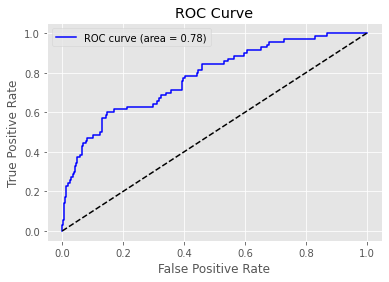

In [ ]:
# Computa probabilidades
y_pred_prob = search_logistic.predict_proba(Xtest)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
auc_value = roc_auc_score(ytest, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(Xtrain, ytrain)

print('Original dataset shape:', Counter(ytrain))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 862, 1: 167})
Resample dataset shape: Counter({0: 167, 1: 167})


In [ ]:
df_nm = pd.concat([x_nm,y_nm],axis=1)
df = df_nm.copy()
# Realizando split dos dados
df_target_encoding = df.copy()
Xtrain_nm = x_nm.copy()
ytrain_nm = y_nm.copy()

In [ ]:
param_grid = {'C': np.arange(0.01,0.05,0.01)}
search_logistic = GridSearchCV(LogisticRegression(penalty='l1',solver='liblinear'), param_grid)
search_logistic.fit(Xtrain_nm,ytrain_nm)
predlogistic = search_logistic.predict(Xtest)

In [ ]:
# Média de acurácia
search_logistic.score(Xtest, ytest)

0.3287981859410431

In [ ]:
# Outras métricas
print(classification_report(ytest, predlogistic))

              precision    recall  f1-score   support

           0       0.80      0.27      0.40       371
           1       0.14      0.64      0.23        70

    accuracy                           0.33       441
   macro avg       0.47      0.46      0.32       441
weighted avg       0.70      0.33      0.38       441



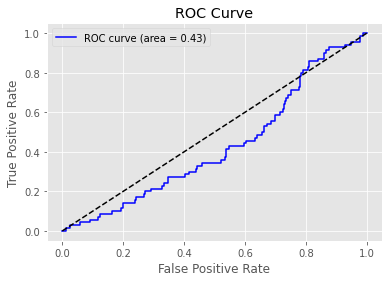

In [ ]:
# Computa probabilidades
y_pred_prob = search_logistic.predict_proba(Xtest)[:,1]

# Gera fpr, tpr e thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
auc_value = roc_auc_score(ytest, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_value)
# curva ROC
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### Penalize Algorithms (Cost-Sensitive Training)

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(Xtrain, ytrain)

svc_predict = svc_model.predict(Xtest)# check performance
print('ROCAUC score:',roc_auc_score(ytest, svc_predict))
print('Accuracy score:',accuracy_score(ytest, svc_predict))
print('F1 score:',f1_score(ytest, svc_predict))

ROCAUC score: 0.5946091644204852
Accuracy score: 0.6689342403628118
F1 score: 0.3177570093457944


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(Xtrain, ytrain)

# predict
rfc_predict = rfc.predict(Xtest)# check performance
print('ROCAUC score:',roc_auc_score(ytest, rfc_predict))
print('Accuracy score:',accuracy_score(ytest, rfc_predict))
print('F1 score:',f1_score(ytest, rfc_predict))

ROCAUC score: 0.6088948787061995
Accuracy score: 0.8684807256235828
F1 score: 0.3555555555555555


### Considerações - Modelo de Machine Learning
**Diante dessas opções de tratamento para dados desbalanceados, nota-se que a técnica: Random over-sampling with imblearn foi a que produziu melhores resultados. Para análise do desempenho dos modelos foram utilizadas as métricas: acurácia, f1 score e área embaixo da curva ROC.**

# Resumo

**Neste projeto foi realizada uma análise exploratória de dados na qual foram obtidas métricas descritivas, análise da distribuição dos dados, foram respondidas algumas hipóteses. Além disso, foram observadas o grau de correlação entre as variáveis e, por fim, desenvolveu-se um modelo de machine learning para prever o desligamento do funcionário baseado nas demais features. Em virtude do desbalanceamento dos dados na variável target foram utilizadas diversas técnicas para tratar este desbalanceamento, em seguida realizou-se uma comparação utilizando algumas métricas e, finalmente, foi escolhido um modelo para este problema.**